In [1]:
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import os
os.listdir('/content/gdrive/My Drive/')

In [13]:
print(len(os.listdir('/content/gdrive/My Drive/Sample-xray/train/Non Covid')))
print(len(os.listdir('/content/gdrive/My Drive/Sample-xray/test/Non Covid')))

804
200


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
path = Path('/content/gdrive/My Drive/Sample-xray')

In [16]:

np.random.seed(41)
data = ImageDataBunch.from_folder(path, train="train", valid ="test",
        ds_tfms=get_transforms(), size=(256,256), bs=32, num_workers=4).normalize()

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Covid', 'Non Covid'], 2, 1598, 402)

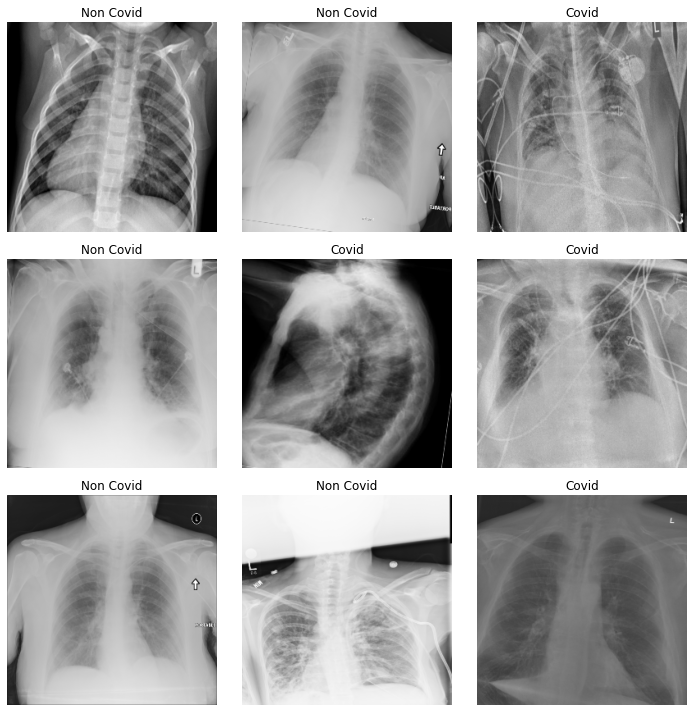

In [18]:
data.show_batch(rows=3, figsize=(10,10))

In [20]:
learn = create_cnn(data, models.resnet50, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [21]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.592148,3.692404,0.552239,00:52
1,0.406510,2.614596,0.569652,00:50
2,0.308783,1.969950,0.547264,00:50
3,0.226133,1.623445,0.584577,00:51
4,0.185470,1.870677,0.562189,00:51


In [27]:
help(create_cnn)

Help on function create_cnn in module fastai.vision.learner:

create_cnn(data, base_arch, **kwargs)

